In [15]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
xmm_file = 'GJ674.fits'

In [3]:
hdul = fits.open(xmm_file)

In [4]:
hdul.info()

Filename: GJ674.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   ()      
  1  Obs Spectrum    1 BinTableHDU     44   249R x 12C   [E, E, E, E, E, E, E, E, E, E, E, E]   
  2  Model Spectrum    1 BinTableHDU     21   2401R x 4C   [E, E, E, E]   
  3  Light curve    1 BinTableHDU     20   97R x 3C   [E, E, E]   


In [5]:
for i in (1,2,3):
    data = hdul[i].data
    print(data.names)

['Wave', 'bin_width', 'Rate', 'Rate_err', 'pn_Rate', 'pn_Rate_err', 'Flux', 'Flux_err', 'MFlux', 'Correction', 'CFlux', 'CFlux_err']
['Wave', 'bin_width', 'Rate', 'Flux']
['Time', 'Rate', 'Error']


In [6]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   48 / length of dimension 1                          
NAXIS2  =                  249 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   12 / number of table fields                         
TTYPE1  = 'Wave    '                                                            
TFORM1  = 'E       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'bin_width'                                                           
TFORM2  = 'E       '        

<ErrorbarContainer object of 3 artists>

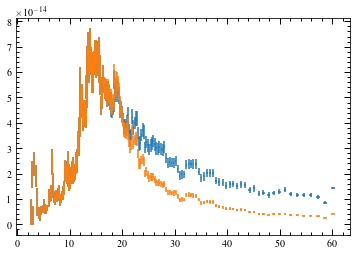

In [7]:
data = hdul[1].data
plt.errorbar(data['WAVE'], data['CFlux'], xerr=data['BIN_WIDTH']/2, yerr = data['CFLUX_err'], ls ='none')
plt.errorbar(data['WAVE'], data['Flux'], xerr=data['BIN_WIDTH']/2, yerr = data['FLUX_err'], ls ='none')

(-1, 65)

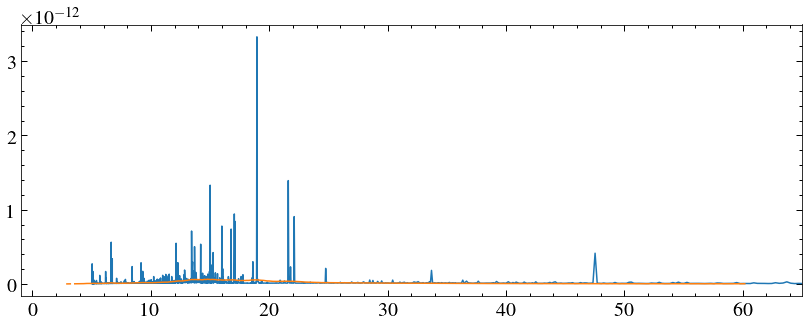

In [16]:
mdata = hdul[2].data
plt.plot(mdata['WAVE'], mdata['FLUX'])
plt.plot(data['WAVE'], data['MFLUX'])
plt.xlim(-1, 65)

<ErrorbarContainer object of 3 artists>

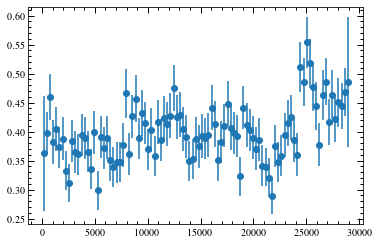

In [9]:
lc = hdul[3].data
plt.errorbar(lc['TIME'], lc['RATE'], yerr=lc['ERROR'], marker='o', ls='none')

(-1, 65)

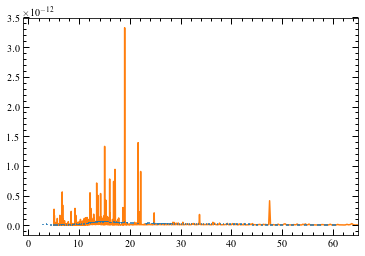

In [10]:
plt.errorbar(data['WAVE'], data['CFlux'], xerr=data['BIN_WIDTH']/2, yerr = data['CFLUX_err'], ls ='none')
plt.plot(mdata['WAVE'], mdata['FLUX'], zorder=-1)
plt.xlim(-1, 65)

In [11]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 2401 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'Wave    '                                                            
TFORM1  = 'E       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'bin_width'                                                           
TFORM2  = 'E       '        

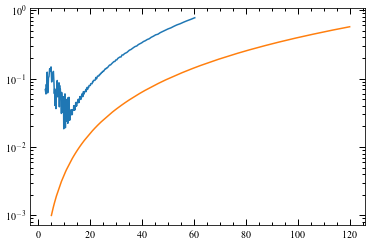

In [12]:
plt.plot(data['wave'],data['bin_width'])
plt.plot(mdata['wave'],mdata['bin_width'])
plt.yscale('log')

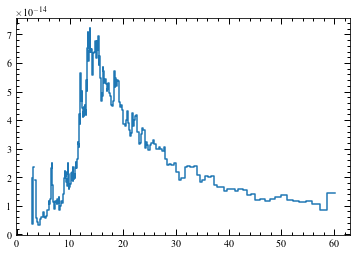

In [13]:
plt.step(data['WAVE'], data['CFlux'])


In [14]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TARGET  = 'GJ 674  '                                                            
OBS_ID  = '0810210301'                                                          
HIERARCH pn_FILTER = 'Medium  '                                                 
HIERARCH pn_MODE = 'IMAGING '                                                   
HIERARCH pn_SUBMODE = 'PrimeSmallWindow'                                        
HIERARCH pn_DATE-OBS = '2018-04-03T06:37:28'                                    
HIERARCH pn_DATE-END = '2018-04-03T14:39:08'                                    
HIERARCH pn_EXP_ID = '0810210301001'                                            
HIERARCH pn_DURATION = 29317

So...I think CFlux is the one to add, have emailed to confirm. No information in headers about what the model parameters are? Lightcurve looks consistent with a straight line. Going to add CFlux to the big spectrum.